# Detectando se 'e homem ou mulher pelas propriedades acusticas de cada voz
(https://www.kaggle.com/primaryobjects/voicegender)

In [1]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Importa o dataset com caracteristicas de vozes para analizar se quem esta falando e um homem ou uma mulher
voz=pd.read_csv('voice.csv', sep=',', encoding='utf-8')


In [3]:
#analise exploratoria dos dados
voz.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [4]:
voz.describe()
#minhas feature (estão todas numericas?)

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

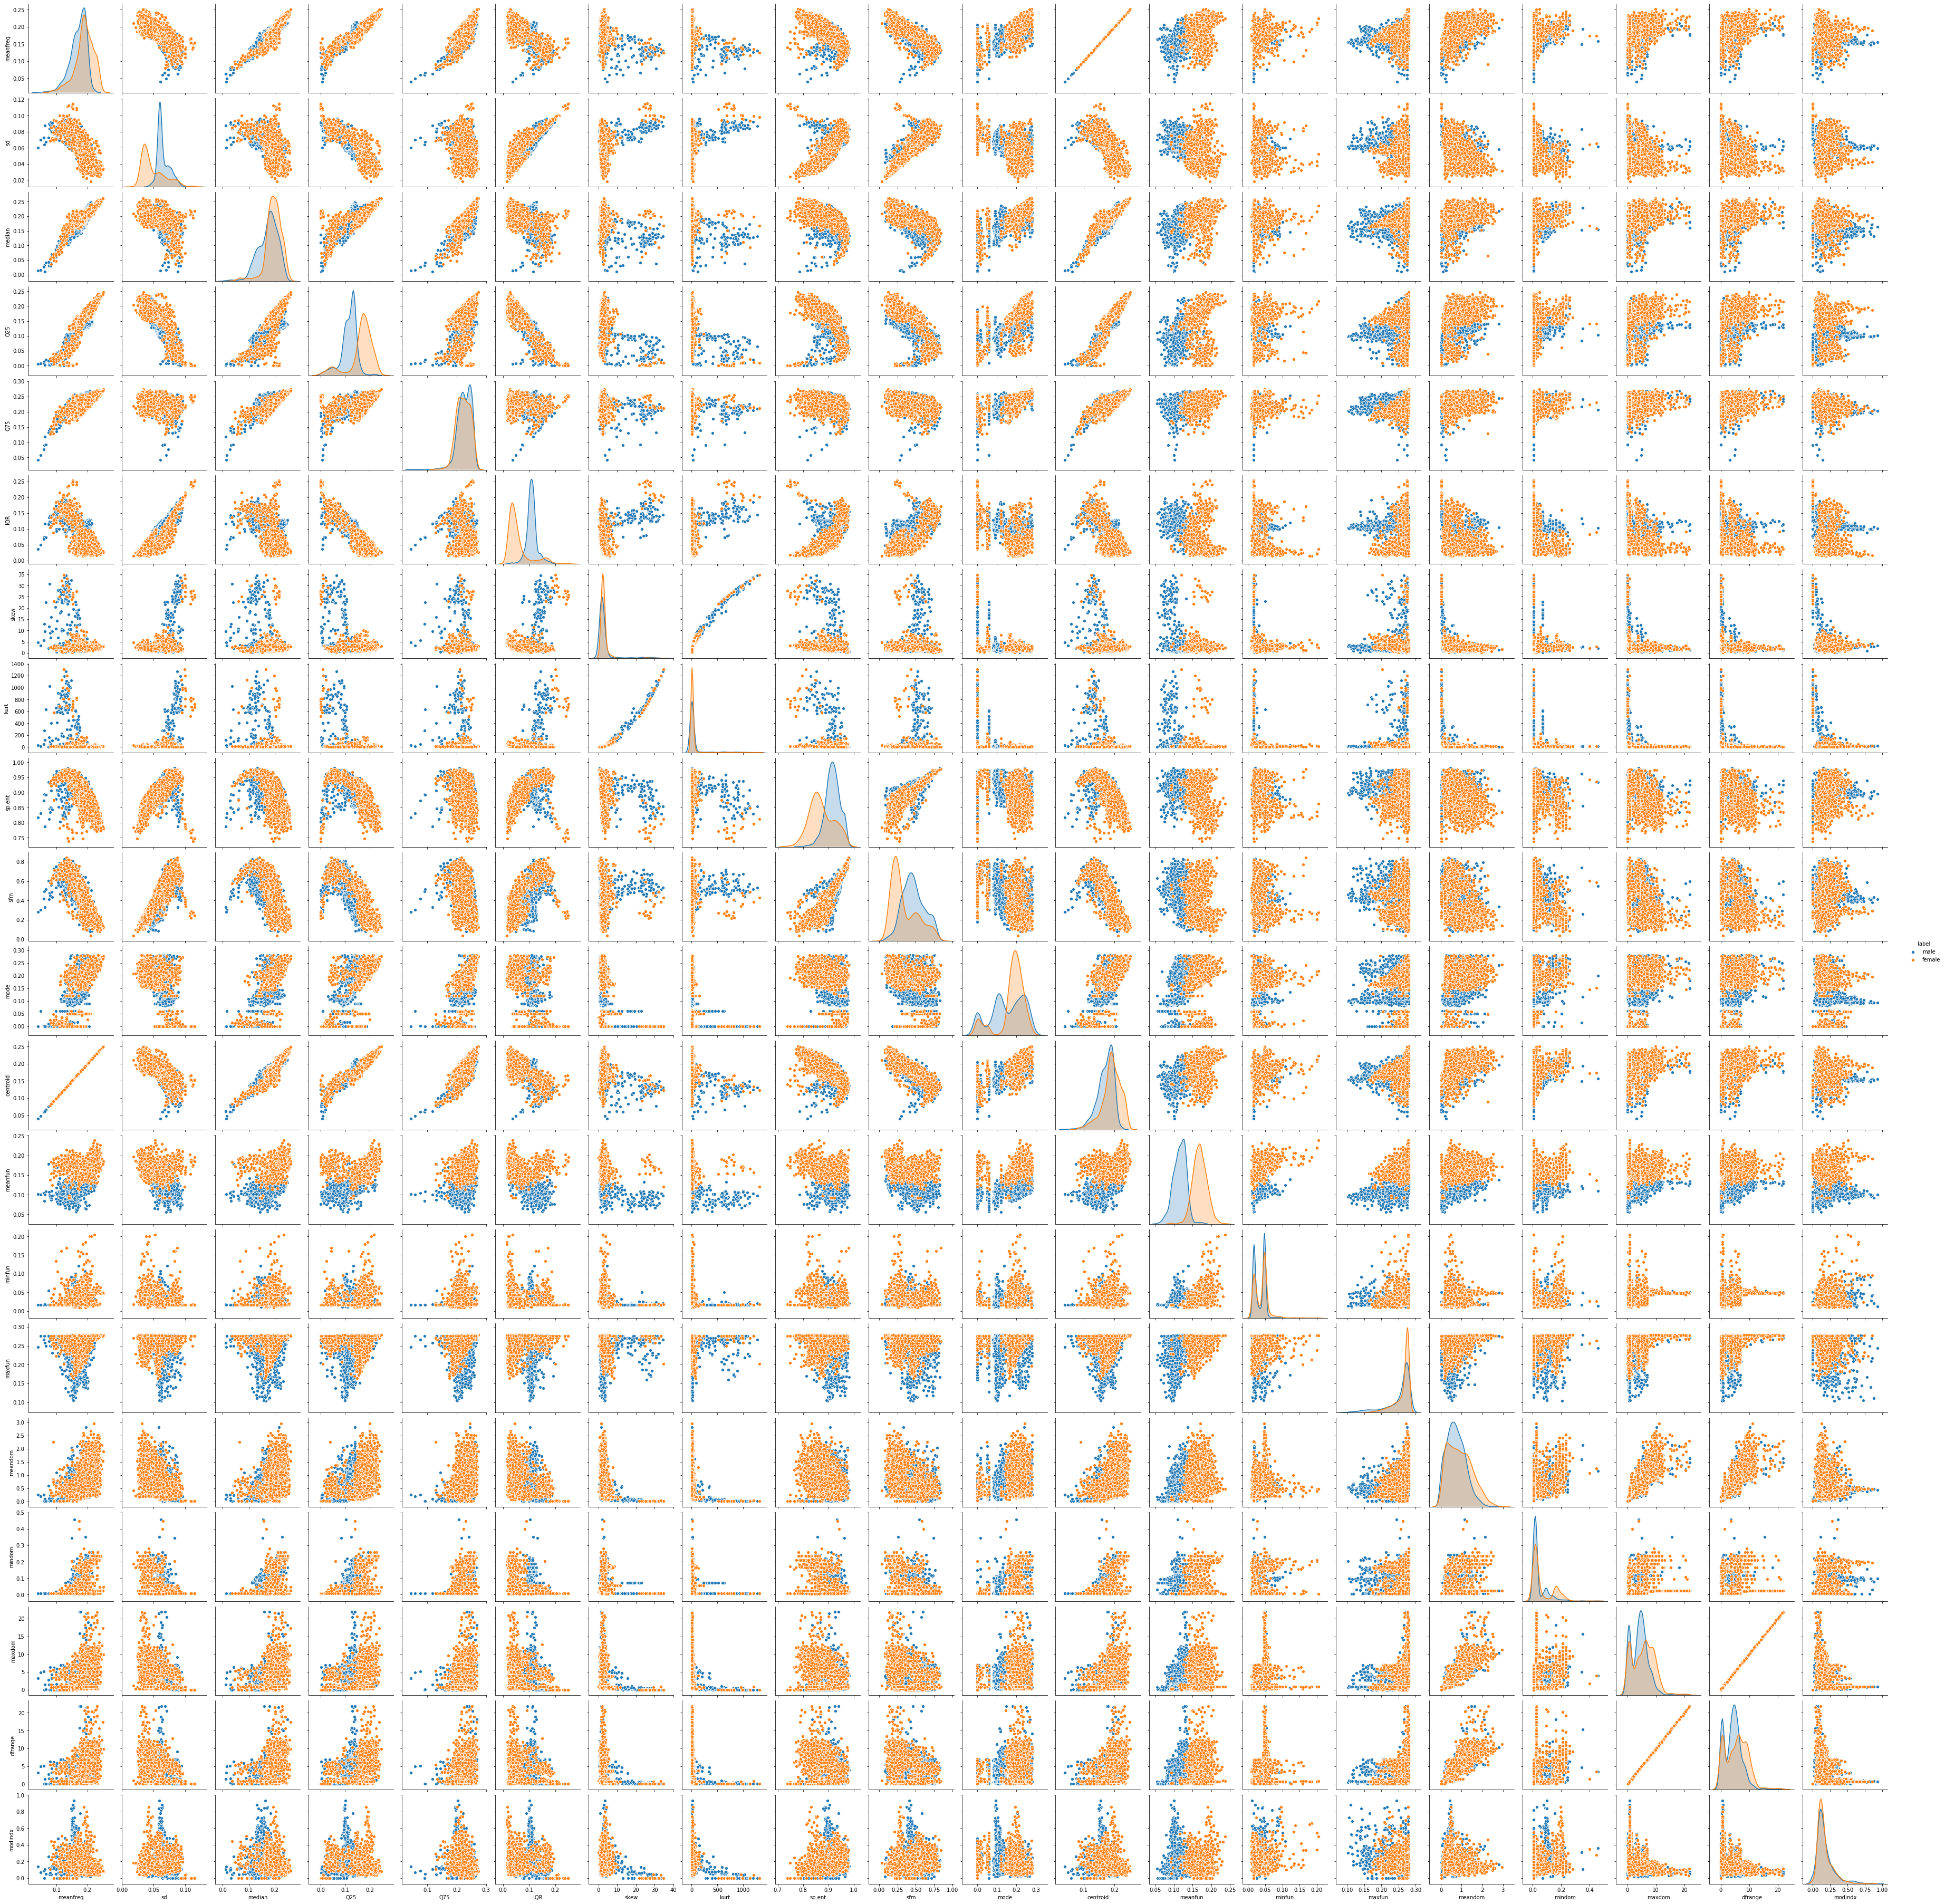

In [5]:
sns.pairplot(voz,hue="label"); #Cuidado para nao explodir seu computador!!!
# remover valora atipicos (outliers) 

# Split para treino.

In [6]:
voz.columns #vejo quais minhas variaveis e qual minha coluna alvo

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [7]:
X=voz[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']] 
#colunas de analise

In [8]:
y=voz[['label']]
#coluna alvo

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)
#dados de treino e dados para teste 20%

In [10]:
X_train[0:1]

meanfreq       sd    median       Q25       Q75       IQR      skew  \
2594  0.238831  0.03006  0.243616  0.220942  0.261017  0.040075  1.918328   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
2594  6.120897  0.814822  0.118336  0.261544  0.238831  0.187539  0.047619   

        maxfun   meandom    mindom    maxdom  dfrange   modindx  
2594  0.277457  1.326923  0.023438  9.773438     9.75  0.137525

In [11]:
y_train[0:1]

label
2594  female

# Treino

In [12]:
vozModel = LogisticRegression()

In [13]:
vozModel.fit(X_train,y_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predito = vozModel.predict(X_test)

In [15]:
y_test[0:10]

label
1752  female
467     male
2704  female
1394    male
122     male
2947  female
1354    male
1260    male
2910  female
2029  female

In [16]:
predito[0:10]#acertou 9/10 das previsoes

array(['female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'female', 'male'], dtype=object)

# Avaliando meu modelo

In [17]:
print(confusion_matrix(y_test,predito,y_test.label.unique()))
#acertou 274 vozes femininas, ja em masculina acertou 302 

[[274  51]
 [  7 302]]


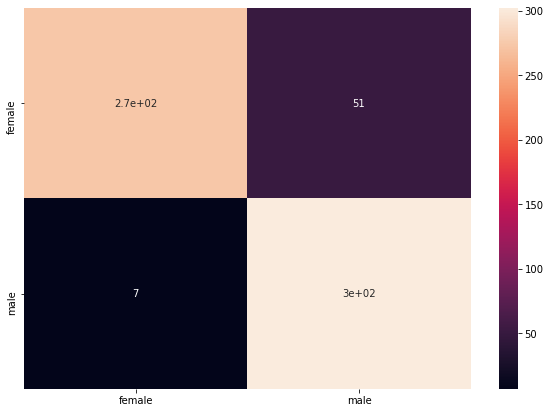

In [18]:
m=confusion_matrix(y_test,predito,y_test.label.unique())
dfm = pd.DataFrame(m, index = [i for i in y_test.label.unique()
],
                  columns = [i for i in y_test.label.unique()])
plt.figure(figsize = (10,7))
sns.heatmap(dfm, annot=True)
#grafico de calor para enxergar melhor, mas os acertos sairam bugados sem numeros redondos.

In [19]:
print(classification_report(y_test,predito,y_test.label.unique()))

              precision    recall  f1-score   support

      female       0.98      0.84      0.90       325
        male       0.86      0.98      0.91       309

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634



In [21]:
#98% de precisao positivas em femininas e 86% de previsoes positivas em masculinas